# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset

In [2]:
dataset = pd.read_csv("../input/datavidia-train/train.csv")
x_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, -1].values

In [3]:
x_test = pd.read_csv("../input/datavidia-test/test.csv")

# Checking Missing Values

In [ ]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = dataset.isnull().sum().sort_values(ascending=False)
percentage = ((dataset.isnull().sum()/len(dataset)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

# Checking Distribution of Data Train

Percentage for default

0    86.42
1    13.58
Name: category, dtype: float64


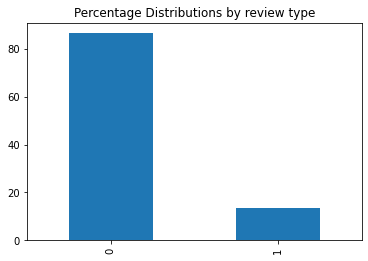

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(dataset.category.value_counts(normalize=True)*100,2))
round(dataset.category.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

# Data Cleaning

In [4]:
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [5]:
dataset['cleaned_review'] = pd.DataFrame(dataset.review_text.apply(cleaned1))
dataset.head(10)

,review_id,review_text,category,cleaned_review
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1,penginapannya rapi bersih suasana tenang pelay...
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0,wifi tidak sampai kamar tidak tersedia heater ...
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0,lantai kamar mandi kotor bau dan seperti sdh j...
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0,wc jorok kasur tidak dibersihkan handuk tidak ...
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,bocor lagi
5,a45d79bde831ad1306adbd8ffb5d3d50,"kebersihan, pelayanan, kerapihan",0,kebersihan pelayanan kerapihan
6,ecdf90bd55184829caae18e5423a2e53,saya hampir tidak bisa tidur krn bantal sangat...,0,saya hampir tidak bisa tidur krn bantal sangat...
7,b0a8cb904f0536dca57bd5be090e510c,"Pelayanannya sangat baik,kmr yang bersih,menu ...",1,pelayanannya sangat baikkmr yang bersihmenu ma...
8,c2dd2ab5fd6880dc2ca8c3901f88dc53,"Kamar banyak kecoa, tlg lebih diperhatikan keb...",0,kamar banyak kecoa tlg lebih diperhatikan kebe...
9,4018a964e23acd6f0363fda9cbbc92ec,kamar mandi banjir,0,kamar mandi banjir


In [6]:
x_test['cleaned_review'] = pd.DataFrame(x_test.review_text.apply(cleaned1))
x_test.head(10)

,review_id,review_text,cleaned_review
0,7302180ac7160f04a405d8aa7bd6beb8,"Kasur rusak, punggung saya sakit, kasurnya ga ...",kasur rusak punggung saya sakit kasurnya ga pa...
1,3184c670e170f565c7522eb76a320ba1,gerah,gerah
2,e33abf6bb5d5a9a77c339043b1725dc8,"tempat ridur atas bawah.. ac nya pararel, tdk ...",tempat ridur atas bawah ac nya pararel tdk ada...
3,061d388950340070a6ac03fabc9027b0,"ac kurang dingin, tidak ada snack sperti di foto",ac kurang dingin tidak ada snack sperti di foto
4,e62d87c348674b6c06856964f3ab16b8,Lumayan untuk guest house dengan standart harg...,lumayan untuk guest house dengan standart harg...
5,22168092df1cee5e8688de966b55d619,Kurang ramah,kurang ramah
6,76f40122d394b72f8aaef6631e778d83,kurang ramah,kurang ramah
7,113d82de96ebe4ce173b5bbd0f27a6f3,sangat mengecewakan. apa yg diberikan tidak se...,sangat mengecewakan apa yg diberikan tidak sep...
8,d067008752ab449382de2362f0d5dbad,ngak recomen deh pokoknya,ngak recomen deh pokoknya
9,4cd34d3b3a65d12768149a06a9234bf9,"TV Tak ada Channel, air kecil",tv tak ada channel air kecil


In [7]:
x_train_new = dataset.cleaned_review
y_train_new = dataset.category
x_test_new = x_test.cleaned_review

# Vectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer(use_idf=True, lowercase = True, strip_accents = 'ascii')
clf2 = LogisticRegression(solver = "lbfgs")

In [9]:
x_train_new2 = tvec.fit_transform(x_train_new)
x_test_new2 =tvec.transform(x_test_new)

# Pipeline model

In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

In [ ]:
model.fit(x_train_new, y_train_new)

predictions = model.predict(x_test_new)

In [ ]:
print(predictions)

# SVC Linear

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train_new2, y_train_new)

SVC(kernel='linear', random_state=0)

In [39]:
predict = classifier.predict(x_test_new2)
print(predict)

[0 0 0 ... 0 0 1]


# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
classifiernb = GaussianNB()
classifiernb.fit(x_train_new2.toarray(), y_train_new)

GaussianNB()

In [44]:
predictnb = classifiernb.predict(x_test_new2.toarray())
print(predictnb)

[0 0 0 ... 0 1 1]


In [ ]:
from tabulate import tabulate

print(tabulate([[x_test.review_id, predict]]))

# XGB

In [16]:
from xgboost import XGBClassifier
classifierxgb = XGBClassifier()
classifierxgb.fit(x_train_new2, y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
predictxgb = classifierxgb.predict(x_test_new2)

In [18]:
print(predictxgb)

[0 0 0 ... 0 0 1]


# Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(x_train_new2, y_train_new)

LogisticRegression()

In [27]:
predictlr = lr.predict(x_test_new2)

In [28]:
print(predictlr)

[0 0 0 ... 0 0 1]


# result jadi dataframe

In [29]:
df = pd.DataFrame(predictlr, columns= ['category'])
print(df)

      category
0            0
1            0
2            0
3            0
4            1
...        ...
3709         0
3710         0
3711         0
3712         0
3713         1

[3714 rows x 1 columns]


# export to csv

In [22]:
df.to_csv ('logisticRegression.csv', index = False)

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr,X = x_train_new2, y = y_train_new, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.85 %
Standard Deviation: 0.58 %
